In [126]:
#vibo: Виталий_Бочаров_56089805, kaggle_score = 0.97555



## **Физтех-Школа Прикладной математики и информатики (ФПМИ) МФТИ**

# Путешествие по Спрингфилду.


Сегодня вам предстоить помочь телекомпании FOX  в обработке их контента. Как вы знаете сериал Симсоны идет на телеэкранах более 25 лет и за это время скопилось очень много видео материала. Персоонажи менялись вместе с изменяющимися графическими технологиями   и Гомер 2018 не очень похож на Гомера 1989. Нашей задачей будет научиться классифицировать персонажей проживающих в Спрингфилде. Думаю, что нет смысла представлять каждого из них в отдельности.



 ![alt text](https://vignette.wikia.nocookie.net/simpsons/images/5/5a/Spider_fat_piglet.png/revision/latest/scale-to-width-down/640?cb=20111118140828)



### Установка зависимостей

In [127]:
#vibo: импортируем pytorch
import torch
from torch.nn import functional as F
from torchvision import datasets, models
#vibo: воспроизводимость результатов
torch.manual_seed(0)

In [128]:
#vibo: устанавливаем torchvision
!pip install -U torch torchvision

In [129]:
#vibo: не понадобилось
'''
# установка подходящей версии torch

from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision

import torch
'''

"\n# установка подходящей версии torch\n\nfrom os.path import exists\nfrom wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag\nplatform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())\ncuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\\.\\([0-9]*\\)\\.\\([0-9]*\\)$/cu\x01\x02/'\naccelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'\n\n!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision\n\nimport torch\n"

In [130]:
# we will verify that GPU is enabled for this notebook
# following should print: CUDA is available!  Training on GPU ...
# 
# if it prints otherwise, then you need to enable GPU: 
# from Menu > Runtime > Change Runtime Type > Hardware Accelerator > GPU


#import torch
import numpy as np

#vibo: проверяем наличие GPU
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

CUDA is available!  Training on GPU ...


In [131]:
#vibo: тоже не понадобилось
'''
# нам необходима версия pillow  5.3.0
# удалим старую версию и установим новую
!pip uninstall -y Pillow
!pip install Pillow==5.3.0
import PIL
print(PIL.PILLOW_VERSION)
# здесь должна быть версия 5.3.0. если это не так перехгрузите данный ноутбук:
# Menu > Runtime > Restart Runtime
'''

'\n# нам необходима версия pillow  5.3.0\n# удалим старую версию и установим новую\n!pip uninstall -y Pillow\n!pip install Pillow==5.3.0\nimport PIL\nprint(PIL.PILLOW_VERSION)\n# здесь должна быть версия 5.3.0. если это не так перехгрузите данный ноутбук:\n# Menu > Runtime > Restart Runtime\n'

In [132]:
#vibo: проверяем версию pil
import PIL
print(PIL.PILLOW_VERSION)

7.1.2


In [133]:
#vibo: монтируем goolge drive
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [9]:
#vibo: здесь спасибо Елене Поздняковой со stepik
#https://stepik.org/lesson/345648/step/1?discussion=4562467&unit=609598 

In [134]:
! pip install kaggle

In [135]:
!pip uninstall -y kaggle

Found existing installation: kaggle 1.5.6
Uninstalling kaggle-1.5.6:
  Successfully uninstalled kaggle-1.5.6


In [136]:
!pip install --upgrade pip

In [137]:
!pip install kaggle==1.5.6

  Using cached kaggle-1.5.6-py3-none-any.whl


In [138]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [139]:
! cp /content/gdrive/MyDrive/kaggle.json ~/.kaggle/

In [140]:
! chmod 600 ~/.kaggle/kaggle.json

In [141]:
#vibo: скачиваем датасет с kaggle
! kaggle competitions download -c journey-springfield

journey-springfield.zip: Skipping, found more recently modified local copy (use --force to force download)


In [18]:
#vibo: разархивируем данные
!unzip -q /content/journey-springfield.zip

In [19]:
#vibo: сделал выше
'''
!unzip -q /content/gdrive/My\ Drive/simpsons/data/dataset.zip -d train
!unzip -q /content/gdrive/My\ Drive/simpsons/data/testset.zip -d test
'''

'\n!unzip -q /content/gdrive/My\\ Drive/simpsons/data/dataset.zip -d train\n!unzip -q /content/gdrive/My\\ Drive/simpsons/data/testset.zip -d test\n'

In [142]:
#vibo: проверяем наличие данных для обучения
!ls train

simpsons_dataset


In [143]:
#vibo: обзор выделенной GPU
!nvidia-smi
#import torch
torch.cuda.is_available()

Sat Nov 27 19:15:46 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P0    73W / 149W |   1252MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

True

В нашем тесте будет 990 картнок, для которых вам будет необходимо предсказать класс.

In [144]:
#vibo: импортируем библиотеки
import pickle
import numpy as np
from skimage import io

from tqdm import tqdm, tqdm_notebook
from PIL import Image
from pathlib import Path

from torchvision import transforms
from multiprocessing.pool import ThreadPool
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn

from matplotlib import colors, pyplot as plt
%matplotlib inline

# в sklearn не все гладко, чтобы в colab удобно выводить картинки 
# мы будем игнорировать warnings
import warnings
warnings.filterwarnings(action='ignore', category=DeprecationWarning)


In [145]:
# разные режимы датасета 
DATA_MODES = ['train', 'val', 'test']
# все изображения будут масштабированы к размеру 224x224 px
RESCALE_SIZE = 224
# работаем на видеокарте
DEVICE = torch.device("cuda")

https://jhui.github.io/2018/02/09/PyTorch-Data-loading-preprocess_torchvision/


Ниже мы исспользуем враппер над датасетом для удобной работы. Вам стоит понимать, что происходит с LabelEncoder и  с torch.Transformation. 

ToTensor конвертирует  PIL Image с параметрами в диапазоне [0, 255] (как все пиксели) в FloatTensor размера (C x H x W) [0,1] , затем производится масштабирование:
$input = \frac{input - \mu}{\text{standard deviation}} $, <br>       константы - средние и дисперсии по каналам на основе ImageNet


Стоит также отметить, что мы переопределяем метод __getitem__ для удобства работы с данной структурой данных.
 Также используется LabelEncoder для преобразования строковых меток классов в id и обратно. В описании датасета указано, что картинки разного размера, так как брались напрямую с видео, поэтому следуем привести их к одному размер (это делает метод  _prepare_sample) 

In [146]:
class SimpsonsDataset(Dataset):
    """
    Датасет с картинками, который паралельно подгружает их из папок
    производит скалирование и превращение в торчевые тензоры
    """
    def __init__(self, files, mode):
        super().__init__()
        # список файлов для загрузки
        self.files = sorted(files)
        # режим работы
        self.mode = mode

        if self.mode not in DATA_MODES:
            print(f"{self.mode} is not correct; correct modes: {DATA_MODES}")
            raise NameError

        self.len_ = len(self.files)
     
        self.label_encoder = LabelEncoder()

        if self.mode != 'test':
            self.labels = [path.parent.name for path in self.files]
            self.label_encoder.fit(self.labels)

            with open('label_encoder.pkl', 'wb') as le_dump_file:
                  pickle.dump(self.label_encoder, le_dump_file)
                      
    def __len__(self):
        return self.len_
      
    def load_sample(self, file):
        image = Image.open(file)
        image.load()
        return image
  
    def __getitem__(self, index):
        # для преобразования изображений в тензоры PyTorch и нормализации входа
        transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) 
        ])
        x = self.load_sample(self.files[index])
        x = self._prepare_sample(x)
        x = np.array(x / 255, dtype='float32')
        x = transform(x)
        if self.mode == 'test':
            return x
        else:
            label = self.labels[index]
            label_id = self.label_encoder.transform([label])
            y = label_id.item()
            return x, y
        
    def _prepare_sample(self, image):
        image = image.resize((RESCALE_SIZE, RESCALE_SIZE))
        return np.array(image)

In [147]:
def imshow(inp, title=None, plt_ax=plt, default=False):
    """Imshow для тензоров"""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt_ax.imshow(inp)
    if title is not None:
        plt_ax.set_title(title)
    plt_ax.grid(False)

In [148]:
#vibo: определяем папки для обучающей вцыборки (ниже ее разделим на train и val)
TRAIN_DIR = Path('./train/simpsons_dataset')
#vibo: папка с 990 объектами для test
TEST_DIR = Path('./testset')

#vibo: файлы для train и val
train_val_files = sorted(list(TRAIN_DIR.rglob('*.jpg')))
#vibo: файлы для test
test_files = sorted(list(TEST_DIR.rglob('*.jpg')))

In [149]:
#vibo: объекты в папке для обучения (train + val) - 42 класса
# !ls ./train/simpsons_dataset

In [150]:
#vibo: количество классов в задаче классификации
#len((set(train_val_labels)))

In [151]:
#vibo: количество картинок на train+val
#len(train_val_files)

In [152]:
#vibo: test файлы
#!ls ./testset/testset

In [153]:
#vibo: количество картинок на тесте
#len(test_files)

In [154]:
# #vibo: посмотрим на баланс классов в обучающем датасете (ниже его делим на train и val)
# from collections import Counter
# my_Dict=Counter(train_val_labels)

# my_sorted_values = sorted(my_Dict.values())
# my_sorted_dict = {}

# for i in my_sorted_values:
#     for k in my_Dict.keys():
#         if my_Dict[k] == i:
#             my_sorted_dict[k] = my_Dict[k]
#             break

In [155]:
# print(my_sorted_dict)

In [159]:
#vibo: base_line без балансировки классов
from sklearn.model_selection import train_test_split

#vibo: делим объекты на train и val для обучения и подбора гиперпараметров
train_val_labels = [path.parent.name for path in train_val_files]

train_files, val_files = train_test_split(train_val_files, test_size=0.25, \
                                          stratify=train_val_labels, random_state=42)

In [160]:
#vibo: определим метки классов для train и val
train_labels = [path.parent.name for path in train_files]
val_labels = [path.parent.name for path in val_files]

In [161]:
from sklearn.model_selection import train_test_split
from random import shuffle
import pandas as pd
from itertools import chain

In [162]:
#vibo: делаем балансировку классов
ALL_LABELS = sorted(set(train_labels))
train_dict = {lbl : [train_files[i] for i in range(len(train_files)) if train_labels[i]==lbl] for lbl in ALL_LABELS}
split_dict = {lbl : [train_labels.count(lbl), val_labels.count(lbl)] for lbl in ALL_LABELS}
split_dict = pd.DataFrame(data=split_dict, index=['Train_Count', 'Val_Count']).T

In [163]:
split_dict

,Train_Count,Val_Count
abraham_grampa_simpson,685,228
agnes_skinner,32,10
apu_nahasapeemapetilon,467,156
barney_gumble,80,26
bart_simpson,1006,336
carl_carlson,74,24
charles_montgomery_burns,895,298
chief_wiggum,739,247
cletus_spuckler,35,12
comic_book_guy,352,117


In [164]:
line = split_dict['Train_Count'].quantile()
display('line: ', line)

'line: '

116.0

In [165]:
#vibo: дополняем классы с малым количеством объектов
for lbl in split_dict[split_dict['Train_Count'] < line].index:
  train_dict[lbl] *= int(line // len(train_dict[lbl]) +1)

In [166]:
#vibo: новый train
train_files = list(chain.from_iterable(train_dict.values()))
shuffle(train_files)
train_labels = [path.parent.name for path in train_files]

In [167]:
#vibo: проверяем что получилось
new_dict = {lbl : [train_labels.count(lbl), val_labels.count(lbl)] for lbl in ALL_LABELS}
new_dict = pd.DataFrame(data=new_dict, index=['Train_Count_New', 'Val_Count_New']).T 
display(split_dict.merge(new_dict, how='left', left_index=True, right_index=True))

,Train_Count,Val_Count,Train_Count_New,Val_Count_New
abraham_grampa_simpson,685,228,685,228
agnes_skinner,32,10,128,10
apu_nahasapeemapetilon,467,156,467,156
barney_gumble,80,26,160,26
bart_simpson,1006,336,1006,336
carl_carlson,74,24,148,24
charles_montgomery_burns,895,298,895,298
chief_wiggum,739,247,739,247
cletus_spuckler,35,12,140,12
comic_book_guy,352,117,352,117


In [168]:
#vibo: датасеты для передачи в класс SimpsonsDataset (формирование батчей и перевод картинок в тензоры)
#train_dataset = SimpsonsDataset(train_files, mode='train')
val_dataset = SimpsonsDataset(val_files, mode='val')
#test_dataset = SimpsonsDataset(test_files, mode='test')

In [169]:
#vibo: не понадобилось

# uncomment if you have problem with pillow
# def register_extension(id, extension): Image.EXTENSION[extension.lower()] = id.upper()
# Image.register_extension = register_extension
# def register_extensions(id, extensions): 
#     for extension in extensions: register_extension(id, extension)
# Image.register_extensions = register_extensions

Давайте посмотрим на наших героев внутри датасета.

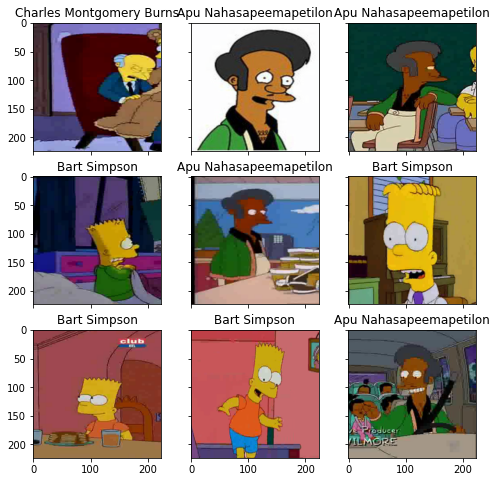

In [170]:
fig, ax = plt.subplots(nrows=3, ncols=3,figsize=(8, 8), \
                        sharey=True, sharex=True)
for fig_x in ax.flatten():
    random_characters = int(np.random.uniform(0,1000))
    im_val, label = val_dataset[random_characters]
    img_label = " ".join(map(lambda x: x.capitalize(),\
                val_dataset.label_encoder.inverse_transform([label])[0].split('_')))
    imshow(im_val.data.cpu(), \
          title=img_label,plt_ax=fig_x)

Можете добавить ваши любимые сцены и классифицировать их. (веселые результаты можно кидать в чат)

### Построение нейросети

Запустить данную сеть будет вашим мини-заданием на первую неделю, чтобы было проще участвовать в соревновании.

Данная архитектура будет очень простой и нужна для того, чтобы установить базовое понимание и получить простенький сабмит на Kaggle

<!-- Здесь вам предлагается дописать сверточную сеть глубины 4/5.  -->

*Описание слоев*:



1. размерность входа: 3x224x224 
2.размерности после слоя:  8x111x111 (8х110х110)
3. 16x54x54
4. 32x26x26
5. 64x12x12
6. выход: 96x5x5


In [171]:
##vibo: base_line 
# # Очень простая сеть
# class SimpleCnn(nn.Module):
  
#     def __init__(self, n_classes):
#         super().__init__()
#         self.conv1 = nn.Sequential(
#             nn.Conv2d(in_channels=3, out_channels=8, kernel_size=3),
#             nn.ReLU(),
#             nn.MaxPool2d(kernel_size=2)
#         )
#         self.conv2 = nn.Sequential(
#             nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3),
#             nn.ReLU(),
#             nn.MaxPool2d(kernel_size=2)
#         )
#         self.conv3 = nn.Sequential(
#             nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3),
#             nn.ReLU(),
#             nn.MaxPool2d(kernel_size=2)
#         )
#         self.conv4 = nn.Sequential(
#             nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3),
#             nn.ReLU(),
#             nn.MaxPool2d(kernel_size=2)
#         )
#         self.conv5 = nn.Sequential(
#             nn.Conv2d(in_channels=64, out_channels=96, kernel_size=3),
#             nn.ReLU(),
#             nn.MaxPool2d(kernel_size=2)
#         )
        
#         self.out = nn.Linear(96 * 5 * 5, n_classes)
  
  
#     def forward(self, x):
#         x = self.conv1(x)
#         x = self.conv2(x)
#         x = self.conv3(x)
#         x = self.conv4(x)
#         x = self.conv5(x)

#         x = x.view(x.size(0), -1)
#         logits = self.out(x)
#         return logits

In [172]:
#vibo: изм.1 фитчеэкстрактор: батчнорм, размер фильтра свертки, страйд, паддинг, классификатор: доп.слои
class SimpleCnn(nn.Module):
  
    def __init__(self, n_classes):
        super().__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=7, stride=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2)
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5, stride=2),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2)
        )
        self.conv3 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv4 = nn.Sequential(
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
        )
        self.conv5 = nn.Sequential(
            nn.Conv2d(in_channels=128, out_channels=128,  kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2)
        )
        self.fc1 = nn.Sequential(
            nn.Linear(6 * 6 * 128, 1024),
            nn.BatchNorm1d(1024),
            nn.ReLU(),
        )

        self.fc2 = nn.Sequential(
            nn.Linear(1024, 1024),
            nn.BatchNorm1d(1024),
            nn.ReLU(),
        )        
        
        self.fc3 = nn.Sequential(
            nn.Linear(1024, 1024),
            nn.BatchNorm1d(1024),
            nn.ReLU(),
        )

        self.out = nn.Sequential(
            nn.Linear(1024, n_classes)
        )
  
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.conv5(x)

        #vibo: изменяем размер для предачи на классификатор
        x = F.interpolate(x, size=(6, 6), mode='bilinear', align_corners = True)
        x = x.view(x.size(0), 6 * 6 * 128)

        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)

        logits = self.out(x)
        return logits

In [173]:
#vibo: base fit_epoch
def fit_epoch(model, train_loader, criterion, optimizer):
    running_loss = 0.0
    running_corrects = 0
    processed_data = 0
  
    for inputs, labels in train_loader:
        inputs = inputs.to(DEVICE)
        labels = labels.to(DEVICE)
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        preds = torch.argmax(outputs, 1)
        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)
        processed_data += inputs.size(0)
              
    train_loss = running_loss / processed_data
    train_acc = running_corrects.cpu().numpy() / processed_data
    return train_loss, train_acc

In [174]:
#vibo: base eval_epoch
def eval_epoch(model, val_loader, criterion):
    model.eval()
    running_loss = 0.0
    running_corrects = 0
    processed_size = 0

    for inputs, labels in val_loader:
        inputs = inputs.to(DEVICE)
        labels = labels.to(DEVICE)

        with torch.set_grad_enabled(False):
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            preds = torch.argmax(outputs, 1)

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)
        processed_size += inputs.size(0)
    val_loss = running_loss / processed_size
    val_acc = running_corrects.double() / processed_size
    return val_loss, val_acc

In [175]:
#vibo: baseline_Adam
# def train(train_files, val_files, model, epochs, batch_size):
#     train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
#     val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

#     history = []
#     log_template = "\nEpoch {ep:03d} train_loss: {t_loss:0.4f} \
#     val_loss {v_loss:0.4f} train_acc {t_acc:0.4f} val_acc {v_acc:0.4f}"

#     with tqdm(desc="epoch", total=epochs) as pbar_outer:
#         opt = torch.optim.Adam(model.parameters())
#         criterion = nn.CrossEntropyLoss()

#         for epoch in range(epochs):
#             train_loss, train_acc = fit_epoch(model, train_loader, criterion, opt)
#             print("loss", train_loss)
            
#             val_loss, val_acc = eval_epoch(model, val_loader, criterion)
#             history.append((train_loss, train_acc, val_loss, val_acc))
            
#             pbar_outer.update(1)
#             tqdm.write(log_template.format(ep=epoch+1, t_loss=train_loss,\
#                                            v_loss=val_loss, t_acc=train_acc, v_acc=val_acc))
            
#     return history

In [184]:
#vibo: меняем Adam на AdamW
def train(train_files, val_files, model, epochs, batch_size):
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    history = []
    log_template = "\nEpoch {ep:03d} train_loss: {t_loss:0.4f} \
    val_loss {v_loss:0.4f} train_acc {t_acc:0.4f} val_acc {v_acc:0.4f}"

    with tqdm(desc="epoch", total=epochs) as pbar_outer:
        opt = torch.optim.AdamW(model.parameters(), lr = 1e-4)
        #opt = torch.optim.AdamW(model.parameters())
        criterion = nn.CrossEntropyLoss()

        for epoch in range(epochs):
            train_loss, train_acc = fit_epoch(model, train_loader, criterion, opt)
            print("loss", train_loss)
            
            val_loss, val_acc = eval_epoch(model, val_loader, criterion)
            history.append((train_loss, train_acc, val_loss, val_acc))
            
            pbar_outer.update(1)
            tqdm.write(log_template.format(ep=epoch+1, t_loss=train_loss,\
                                           v_loss=val_loss, t_acc=train_acc, v_acc=val_acc))
            
    return history

In [177]:
def predict(model, test_loader):
    with torch.no_grad():
        logits = []
    
        for inputs in test_loader:
            inputs = inputs.to(DEVICE)
            model.eval()
            outputs = model(inputs).cpu()
            logits.append(outputs)
            
    probs = nn.functional.softmax(torch.cat(logits), dim=-1).numpy()
    return probs

In [178]:
n_classes = len(np.unique(train_val_labels))
simple_cnn = SimpleCnn(n_classes).to(DEVICE)
print("we will classify :{}".format(n_classes))
print(simple_cnn)

we will classify :42
SimpleCnn(
  (conv1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(7, 7), stride=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(5, 5), stride=(2, 2))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv3): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv4): Sequential(
    (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (co

Запустим обучение сети.

In [179]:
if val_dataset is None:
    val_dataset = SimpsonsDataset(val_files, mode='val')
    
train_dataset = SimpsonsDataset(train_files, mode='train')

In [ ]:
#history = train(train_dataset, val_dataset, model=simple_cnn, epochs=2, batch_size=64)
#f1_base = 0.652, kaggle = 0.76301

In [ ]:
#history = train(train_dataset, val_dataset, model=simple_cnn, epochs=4, batch_size=4)
#f1_base_stepik = 0.769, kaggle = 0.88097

In [ ]:
#history = train(train_dataset, val_dataset, model=simple_cnn, epochs=4, batch_size=32)
#f1_base_AdamW= 0.732, kaggle = 0.91392 

In [ ]:
#history = train(train_dataset, val_dataset, model=simple_cnn, epochs=20, batch_size=32)
#f1_base_upg1_AdamW = 0.8119, kaggle = 0.93942  

In [ ]:
#history = train(train_dataset, val_dataset, model=simple_cnn, epochs=20, batch_size=16)
#f1_base_upg2_AdamW = 0.889, kaggle = 0.96174  

In [ ]:
#history = train(train_dataset, val_dataset, model=simple_cnn, epochs=30, batch_size=16)
#f1_base_upg4_AdamW_bln = 0.8459, kaggle = (0.96705)

In [185]:
history = train(train_dataset, val_dataset, model=simple_cnn, epochs=20, batch_size=32)
#f1_base_upg5_AdamW_bln = 0.874, kaggle = 0.97555

epoch:   0%|          | 0/20 [00:00<?, ?it/s]

loss 0.06529395999344849


epoch:   5%|▌         | 1/20 [03:07<59:23, 187.53s/it]


Epoch 001 train_loss: 0.0653     val_loss 0.5077 train_acc 0.9811 val_acc 0.9035
loss 0.023121667326511587


epoch:  10%|█         | 2/20 [06:13<55:58, 186.60s/it]


Epoch 002 train_loss: 0.0231     val_loss 0.5542 train_acc 0.9938 val_acc 0.9060
loss 0.012097658996249205


epoch:  15%|█▌        | 3/20 [09:17<52:32, 185.46s/it]


Epoch 003 train_loss: 0.0121     val_loss 0.6050 train_acc 0.9966 val_acc 0.9045
loss 0.006939208424235623


epoch:  20%|██        | 4/20 [12:23<49:27, 185.44s/it]


Epoch 004 train_loss: 0.0069     val_loss 0.6795 train_acc 0.9983 val_acc 0.9028
loss 0.004451909029533931


epoch:  25%|██▌       | 5/20 [15:26<46:11, 184.79s/it]


Epoch 005 train_loss: 0.0045     val_loss 0.7304 train_acc 0.9986 val_acc 0.9028
loss 0.0036008434222712864


epoch:  30%|███       | 6/20 [18:29<42:59, 184.23s/it]


Epoch 006 train_loss: 0.0036     val_loss 0.7616 train_acc 0.9990 val_acc 0.9035
loss 0.009091064417310292


epoch:  35%|███▌      | 7/20 [21:33<39:53, 184.11s/it]


Epoch 007 train_loss: 0.0091     val_loss 0.8310 train_acc 0.9975 val_acc 0.8995
loss 0.0037416122164057597


epoch:  40%|████      | 8/20 [24:37<36:48, 184.00s/it]


Epoch 008 train_loss: 0.0037     val_loss 0.9060 train_acc 0.9988 val_acc 0.8936
loss 0.005249567098418663


epoch:  45%|████▌     | 9/20 [27:40<33:39, 183.62s/it]


Epoch 009 train_loss: 0.0052     val_loss 0.8813 train_acc 0.9988 val_acc 0.8940
loss 0.0016306191025653326


epoch:  50%|█████     | 10/20 [30:44<30:38, 183.88s/it]


Epoch 010 train_loss: 0.0016     val_loss 0.8564 train_acc 0.9994 val_acc 0.9022
loss 0.0006348484273852013


epoch:  55%|█████▌    | 11/20 [33:48<27:35, 183.90s/it]


Epoch 011 train_loss: 0.0006     val_loss 0.8654 train_acc 0.9998 val_acc 0.9039
loss 0.00035242401452549593


epoch:  60%|██████    | 12/20 [36:52<24:31, 183.98s/it]


Epoch 012 train_loss: 0.0004     val_loss 0.8846 train_acc 0.9998 val_acc 0.9041
loss 0.00030275824163931894


epoch:  65%|██████▌   | 13/20 [39:56<21:27, 183.95s/it]


Epoch 013 train_loss: 0.0003     val_loss 0.9048 train_acc 0.9998 val_acc 0.9045
loss 0.0002772067783586306


epoch:  70%|███████   | 14/20 [43:01<18:24, 184.08s/it]


Epoch 014 train_loss: 0.0003     val_loss 0.9250 train_acc 0.9998 val_acc 0.9035
loss 0.0002733212951122207


epoch:  75%|███████▌  | 15/20 [46:04<15:19, 183.85s/it]


Epoch 015 train_loss: 0.0003     val_loss 0.9447 train_acc 0.9998 val_acc 0.9041
loss 0.00021736392021783296


epoch:  80%|████████  | 16/20 [49:17<12:26, 186.69s/it]


Epoch 016 train_loss: 0.0002     val_loss 0.9690 train_acc 0.9998 val_acc 0.9043
loss 0.00021059817091816286


epoch:  85%|████████▌ | 17/20 [52:35<09:30, 190.05s/it]


Epoch 017 train_loss: 0.0002     val_loss 0.9928 train_acc 0.9998 val_acc 0.9043
loss 0.0001983992460739704


epoch:  90%|█████████ | 18/20 [55:53<06:25, 192.54s/it]


Epoch 018 train_loss: 0.0002     val_loss 1.0177 train_acc 0.9998 val_acc 0.9041
loss 0.0001965138643712188


epoch:  95%|█████████▌| 19/20 [59:07<03:12, 192.86s/it]


Epoch 019 train_loss: 0.0002     val_loss 1.0466 train_acc 0.9998 val_acc 0.9033
loss 0.0010869138524710444


epoch: 100%|██████████| 20/20 [1:02:10<00:00, 186.55s/it]


Epoch 020 train_loss: 0.0011     val_loss 1.2782 train_acc 0.9998 val_acc 0.8888


In [186]:
#vibo: сохраним лучшую модель (ее веса)
torch.save(simple_cnn.state_dict(), 'Best_model_upg5_AdamW_bln.pth')

In [187]:
#vibo: проверим, что модель сохранилась
simple_cnn.load_state_dict(torch.load('Best_model_upg5_AdamW_bln.pth'))

<All keys matched successfully>

Построим кривые обучения

In [188]:
loss, acc, val_loss, val_acc = zip(*history)

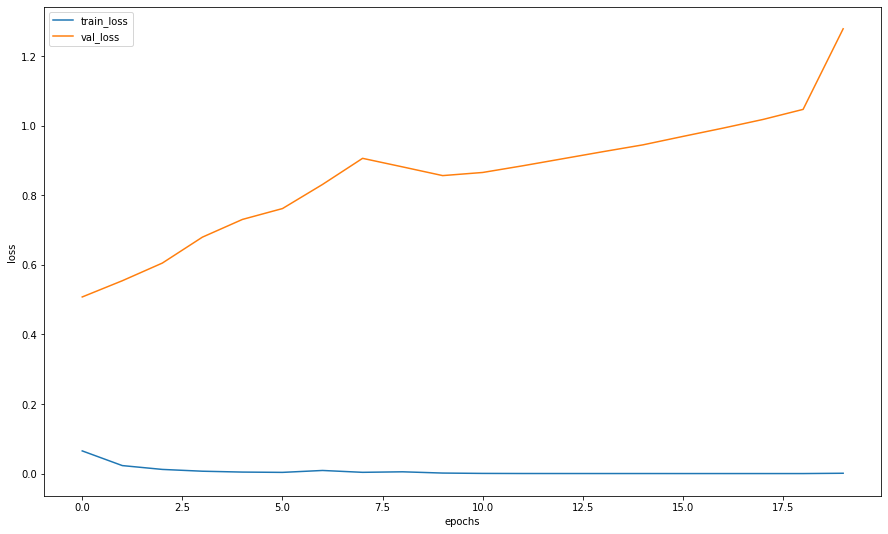

In [189]:
plt.figure(figsize=(15, 9))
plt.plot(loss, label="train_loss")
plt.plot(val_loss, label="val_loss")
plt.legend(loc='best')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

### Ну и что теперь со всем этим делать?

![alt text](https://www.indiewire.com/wp-content/uploads/2014/08/the-simpsons.jpg)

Хорошо бы понять, как сделать сабмит. 
У нас есть сеть и методы eval у нее, которые позволяют перевести сеть в режим предсказания. Стоит понимать, что у нашей модели на последнем слое стоит softmax, которые позволяет получить вектор вероятностей  того, что объект относится к тому или иному классу. Давайте воспользуемся этим.

In [190]:
def predict_one_sample(model, inputs, device=DEVICE):
    """Предсказание, для одной картинки"""
    with torch.no_grad():
        inputs = inputs.to(device)
        model.eval()
        logit = model(inputs).cpu()
        probs = torch.nn.functional.softmax(logit, dim=-1).numpy()
    return probs

In [191]:
random_characters = int(np.random.uniform(0,1000))
ex_img, true_label = val_dataset[random_characters]
probs_im = predict_one_sample(simple_cnn, ex_img.unsqueeze(0))

In [192]:
idxs = list(map(int, np.random.uniform(0,1000, 20)))
imgs = [val_dataset[id][0].unsqueeze(0) for id in idxs]

probs_ims = predict(simple_cnn, imgs)

In [193]:
label_encoder = pickle.load(open("label_encoder.pkl", 'rb'))

In [194]:
y_pred = np.argmax(probs_ims,-1)

actual_labels = [val_dataset[id][1] for id in idxs]

preds_class = [label_encoder.classes_[i] for i in y_pred]

Обратите внимание, что метрика, которую необходимо оптимизировать в конкурсе --- f1-score. Вычислим целевую метрику на валидационной выборке.

In [195]:
'''
from sklearn.metrics import f1_score

f1_score(actual_labels, preds_class)
'''

'\nfrom sklearn.metrics import f1_score\n\nf1_score(actual_labels, preds_class)\n'

In [196]:
from sklearn.metrics import f1_score

def make_f1_score(model, n=1000):
    idxs = list(map(int, np.random.uniform(0, n, n)))
    imgs = [val_dataset[id][0].unsqueeze(0) for id in idxs]
    probs_ims = predict(model, imgs)
    y_pred = np.argmax(probs_ims,-1)
    actual_labels = [val_dataset[id][1] for id in idxs]
    preds_class = list(y_pred)
    return f1_score(actual_labels, preds_class, average='micro')

make_f1_score(model=simple_cnn)

0.874

Сделаем классную визуализацию,  чтобы посмотреть насколько сеть уверена в своих ответах. Можете исспользовать это, чтобы отлаживать правильность вывода.

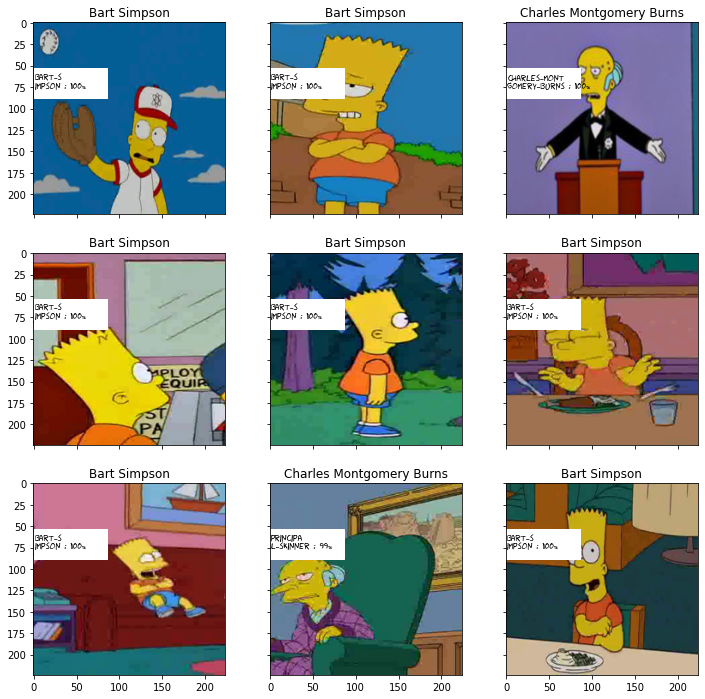

In [197]:
import matplotlib.patches as patches
from matplotlib.font_manager import FontProperties

fig, ax = plt.subplots(nrows=3, ncols=3,figsize=(12, 12), \
                        sharey=True, sharex=True)
for fig_x in ax.flatten():
    random_characters = int(np.random.uniform(0,1000))
    im_val, label = val_dataset[random_characters]
    img_label = " ".join(map(lambda x: x.capitalize(),\
                val_dataset.label_encoder.inverse_transform([label])[0].split('_')))
    
    

    imshow(im_val.data.cpu(), \
          title=img_label,plt_ax=fig_x)
    
    actual_text = "Actual : {}".format(img_label)
            
    fig_x.add_patch(patches.Rectangle((0, 53),86,35,color='white'))
    font0 = FontProperties()
    font = font0.copy()
    font.set_family("fantasy")
    prob_pred = predict_one_sample(simple_cnn, im_val.unsqueeze(0))
    predicted_proba = np.max(prob_pred)*100
    y_pred = np.argmax(prob_pred)
    
    predicted_label = label_encoder.classes_[y_pred]
    predicted_label = predicted_label[:len(predicted_label)//2] + '\n' + predicted_label[len(predicted_label)//2:]
    predicted_text = "{} : {:.0f}%".format(predicted_label,predicted_proba)
            
    fig_x.text(1, 59, predicted_text , horizontalalignment='left', fontproperties=font,
                    verticalalignment='top',fontsize=8, color='black',fontweight='bold')

Попробуйте найти те классы, которые сеть не смогла расспознать. Изучите данную проблему, это понадобится в дальнейшем.

### Submit на Kaggle

![alt text](https://i.redd.it/nuaphfioz0211.jpg)

In [198]:
test_dataset = SimpsonsDataset(test_files, mode="test")
test_loader = DataLoader(test_dataset, shuffle=False, batch_size=64)
probs = predict(simple_cnn, test_loader)

preds = label_encoder.inverse_transform(np.argmax(probs, axis=1))
test_filenames = [path.name for path in test_dataset.files]


In [199]:
! ls

Best_model_upg3_AdamW_bln.csv  journey-springfield.zip
Best_model_upg3_AdamW_bln.pth  label_encoder.pkl
Best_model_upg4_AdamW_bln.csv  sample_data
Best_model_upg4_AdamW_bln.pth  sample_submission.csv
Best_model_upg5_AdamW_bln.pth  testset
characters_illustration.png    train
gdrive


In [200]:
import pandas as pd
my_submit = pd.read_csv("/content/sample_submission.csv")
my_submit = pd.DataFrame({'Id': test_filenames, 'Expected': preds})
my_submit.head()

,Id,Expected
0,img0.jpg,nelson_muntz
1,img1.jpg,bart_simpson
2,img10.jpg,ned_flanders
3,img100.jpg,chief_wiggum
4,img101.jpg,apu_nahasapeemapetilon


In [201]:
# TODO : сделайте сабмит (это важно, если Вы не справляетесь, но дошли до этой ячейки, то сообщите в чат и Вам помогут)

In [202]:
my_submit.to_csv('/content/Best_model_upg5_AdamW_bln.csv', index=False)

## Приключение?

А теперь самое интересное, мы сделали простенькую сверточную сеть и смогли отправить сабмит, но получившийся скор нас явно не устраивает. Надо с этим что-то сделать. 

Несколько срочныйх улучшейни для нашей сети, которые наверняка пришли Вам в голову: 


*   Учим дольше и изменяем гиперпараметры сети
*  learning rate, batch size, нормализация картинки и вот это всё
*   Кто же так строит нейронные сети? А где пулинги и батч нормы? Надо добавлять
*  Ну разве Адам наше все? [adamW](https://www.fast.ai/2018/07/02/adam-weight-decay/) для практика, [статейка для любителей](https://openreview.net/pdf?id=ryQu7f-RZ) (очень хороший анализ), [наши ](https://github.com/MichaelKonobeev/adashift/) эксперименты для заинтересованных.

* Ну разве это deep learning? Вот ResNet и Inception, которые можно зафайнтьюнить под наши данные, вот это я понимаю (можно и обучить в колабе, а можно и [готовые](https://github.com/Cadene/pretrained-models.pytorch) скачать).

* Данных не очень много, можно их аугументировать и  доучититься на новом датасете ( который уже будет состоять из, как  пример аугументации, перевернутых изображений)

* Стоит подумать об ансамблях


Надеюсь, что у Вас получится!

![alt text](https://pbs.twimg.com/profile_images/798904974986113024/adcQiVdV.jpg)
